# TEST different approach

In [1]:
from src.image_OCT import *
from src.image_Quantification import *
from src.image_Quantification_2 import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re
import pandas as pd
import math 
import seaborn as sns
from sklearn import datasets, svm

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline

def plot_treatment(im):
	plt.figure(figsize=(15,15))
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 3.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy_2','NASRAM_OD_Cross.jpg')
# filepathname=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','80608_REZAZK_OS.jpg')

im=image_OCT(filepathname)
print(im.Path_eye)
im.AutoTreatment()
# plot_treatment(im)
moving=False

Cross


(0.0, 110.0)

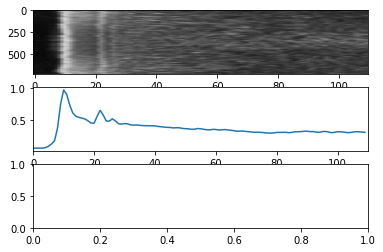

In [3]:
intentityProfile=np.mean(im.OCT_flat,1)							#Compute the profile

indexMax=np.argmax(intentityProfile)
peak=argrelextrema(intentityProfile, np.greater)
npeak1=np.unique(np.where(peak >= indexMax, peak,indexMax)[0])

intentityProfile_integ=np.trapz(intentityProfile)

pre_window=10
post_window=100
fig,ax=plt.subplots(3,1)
ax[0].imshow((im.OCT_flat[npeak1[0]-pre_window:npeak1[0]+post_window][:]).T,aspect="auto",cmap="gray")
ax[1].plot(intentityProfile[npeak1[0]-pre_window:npeak1[0]+post_window])
ax[1].set_xlim([0,pre_window+post_window])
# ax[2].plot(intentityProfile_integ[npeak1[0]-pre_window:npeak1[0]+post_window])
# ax[2].set_xlim([-1,pre_window+post_window])

74.52662519248821